# House Price Prediction

### Import Libraries

In [1]:
import os
os.makedirs("outputs", exist_ok=True)

In [2]:
import os
print(os.getcwd())
print(os.listdir())

C:\Users\AAA\OneDrive\Desktop\EduLinkUp Internship task
['.ipynb_checkpoints', 'boston_house_price_model.pkl', 'House Price Prediction.ipynb', 'HousingData.csv', 'outputs']


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import joblib

### Loading Dataset

In [5]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Exploratory Data Analysis (EDA)

### Dataset Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Finding missing values

In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### Correlation Heatmap

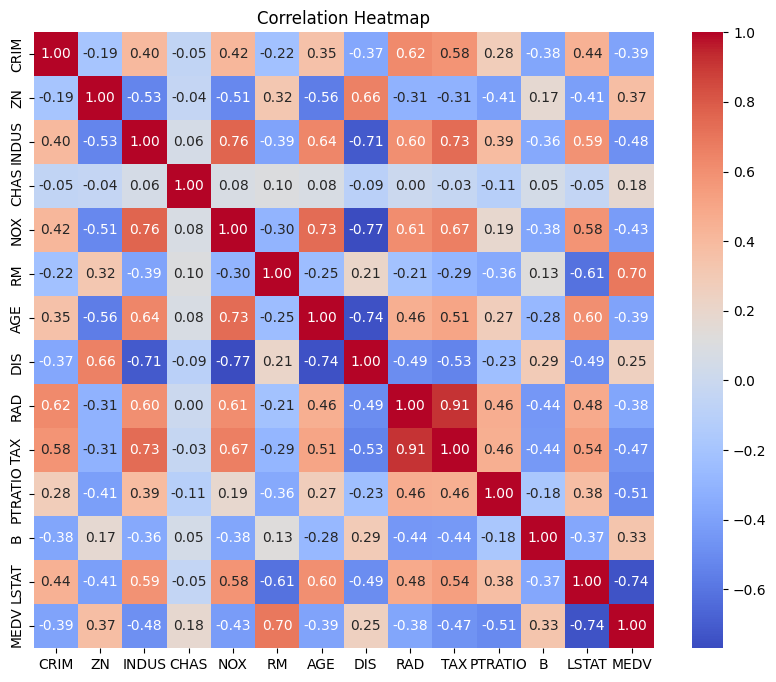

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

plt.savefig("outputs/correlation_heatmap.png", bbox_inches="tight")
plt.show()

### Distribution of target variables

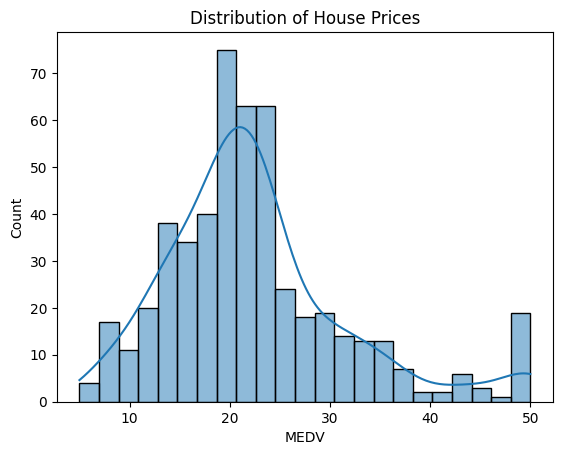

In [9]:
sns.histplot(df["MEDV"], kde=True)
plt.title("Distribution of House Prices")
plt.show()

### Feature & Target Split

In [10]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

### Handling missing values

In [11]:
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

### Feature Scaling

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

### Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Linear Regression Model

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_lr_pred = lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_lr_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))
print("Linear Regression RMSE:", rmse)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_lr_pred))

Linear Regression R2: 0.658852019550812
Linear Regression RMSE: 5.001766890194189
Linear Regression MAE: 3.1499233573458003


### Random Forest Regresssor

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_rf_pred))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_rf_pred))
print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mean_absolute_error(y_test, y_rf_pred))

Random Forest R2: 0.8875859995747116
Random Forest RMSE: 2.871192074970351
Random Forest MAE: 2.067480392156863


### Actual VS Predicted Plot

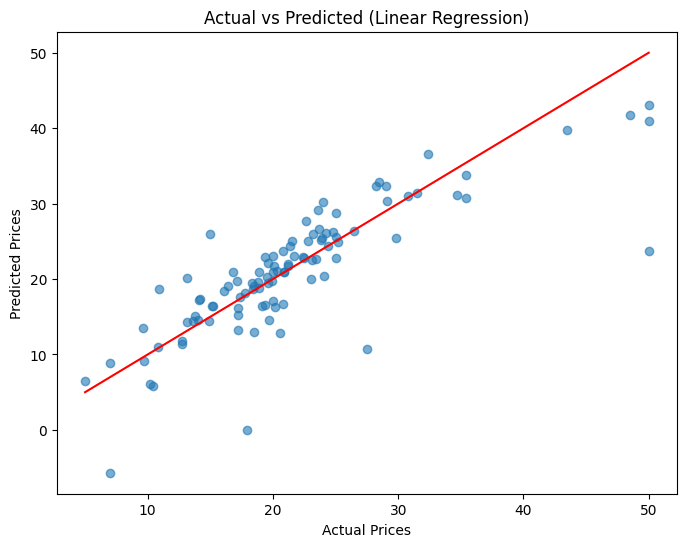

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_lr_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Linear Regression)")

plt.savefig("outputs/actual_vs_predicted_lr.png", bbox_inches="tight")
plt.show()

### Residual Analysis

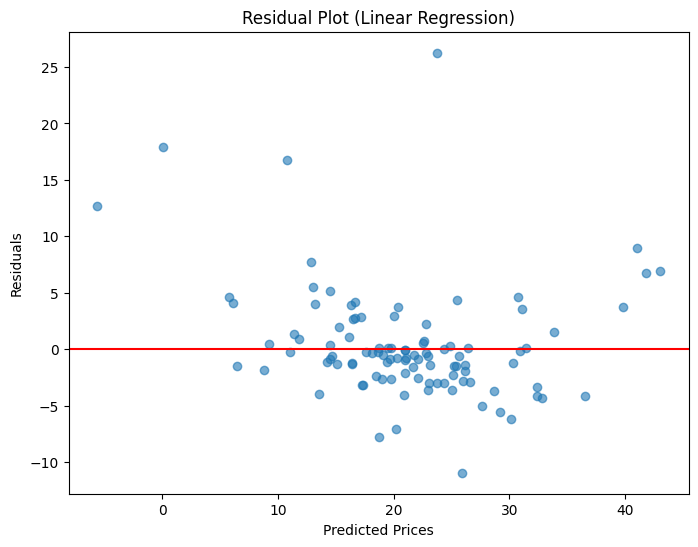

In [20]:
residuals_lr = y_test - y_lr_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_lr_pred, residuals_lr, alpha=0.6)
plt.axhline(0, color='red')

plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")

plt.savefig("outputs/residuals_lr.png", bbox_inches="tight")
plt.show()


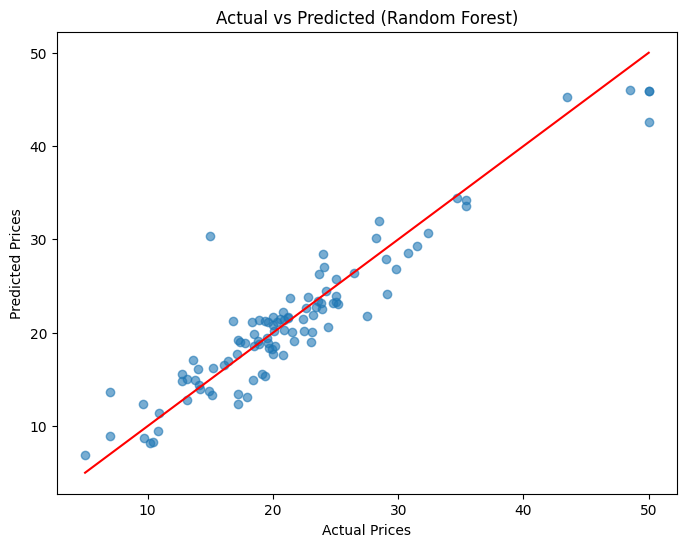

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Random Forest)")

plt.savefig("outputs/actual_vs_predicted_rf.png", bbox_inches="tight")
plt.show()

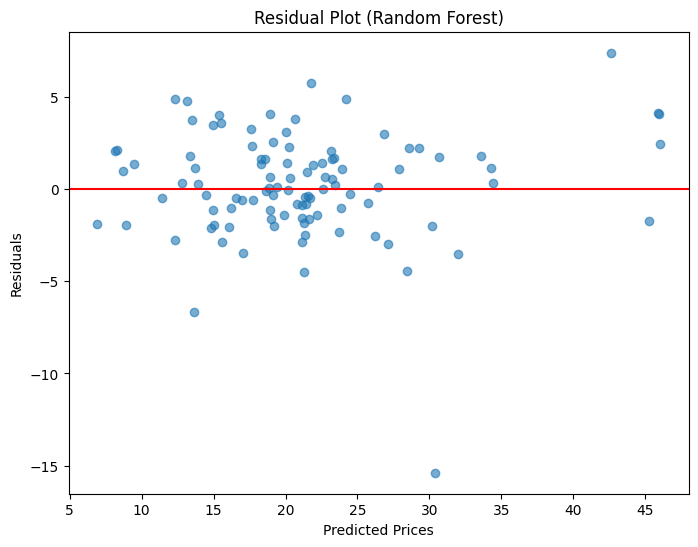

In [22]:
residuals_rf = y_test - y_rf_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_rf_pred, residuals_rf, alpha=0.6)
plt.axhline(0, color='red')

plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")

plt.savefig("outputs/residuals_rf.png", bbox_inches="tight")
plt.show()

### Feature Importance

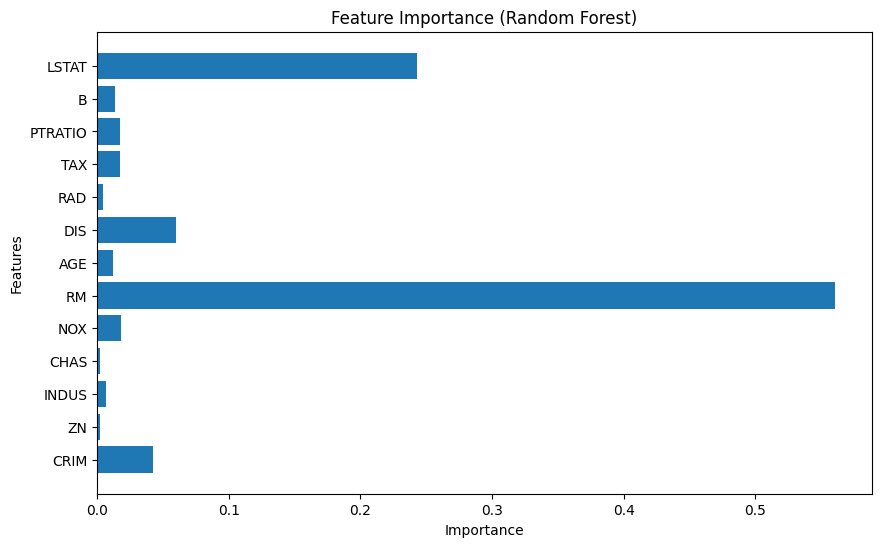

In [23]:
feature_names = df.drop("MEDV", axis=1).columns
importances = rf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()

### Cross Validation

In [24]:
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring="r2")
print("Cross-validation R2 scores:", cv_scores)
print("Average CV R2 score:", cv_scores.mean())

Cross-validation R2 scores: [0.76448057 0.8587756  0.68120408 0.44644399 0.40508635]
Average CV R2 score: 0.6311981168994344


### Ridge Regression

In [25]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)
print("Ridge Regression R2:", r2_score(y_test, y_ridge_pred))

Ridge Regression R2: 0.6587904944118953


### Save the model

In [26]:
joblib.dump(rf, "boston_house_price_model.pkl")
print("Model saved successfully!")

Model saved successfully!
